In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import re

## cyber data cleaning

In [5]:
# load dataset
cyber = pd.read_csv('CyberAttacks.csv')
cyber = cyber.replace('?', np.nan)
cyber['date'] = pd.to_datetime(cyber['date'], dayfirst=True)

cyber['target_code'] = cyber.target_class.str[0]
cyber["target_class"] = cyber.target_class.str[1:]
cyber = cyber.set_index('date')
cyber['year'] = cyber.index.year
cyber['month'] = cyber.index.month


#pd.set_option('display.max_columns', cyber.shape[1])
#cyber.shape

cyber['country'].replace(regex=True, inplace=True, to_replace=('>1'), value='Multiple')
cyber.target_class.astype('str')
cyber['target_class'].replace(inplace=True, regex=True, to_replace=('Accommodation and food service activities'), value=('Hospitality'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Activities of extraterritorial organizations and bodies'), value=('NGO activities'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Administrative and support service activities'), value=('Human Resources'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Arts entertainment and recreation'), value=('Arts and Entertainment'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Electricity gas steam and air conditioning supply'), value=('Utilities provider'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Financial and insurance activities'), value=('Finances'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Human health and social work activities'), value=('Healthcare'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Information and communication'), value=('IT'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Multiple Targets'), value=('Multiple targets'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Professional scientific and technical activities'), value=('Sciences'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Public administration and defence; compulsory social security'), value=('Government'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Public administration and defence, compulsory social security'), value=('Government'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Transportation and storage'), value=('Transportation'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Water supply, sewerage waste management, and remediation activities'), value=('Water supply'))
cyber.target_class.replace(inplace=True, regex=True, to_replace=('Wholesale and retail trade; repair of motor vehicles and motorcycles'), value=('Wholesale and retail trade'))

#cyber.to_csv('cyber_cleaned')
cyber

,attack,attack_class,author,country,description,target,target_class,url,target_code,year,month
date,,,,,,,,,,,
2018-01-01,Unknown,CC,NaN,UK,2018 begins with a new round of Fappening leak...,Faye Brookes,Individual,http://news.softpedia.com/news/the-2018-fappen...,X,2018,1
2018-01-01,Malware,CC,NaN,US,Rockingham County Schools servers are compromi...,Rockingham County Schools,Education,https://www.databreaches.net/nc-emotet-malware...,P,2018,1
2018-01-02,Unknown,CC,Andariel,KR,Bloomberg reveals that a hacking unit called A...,Unnamed South Korean Company,Unknown,https://www.bloomberg.com/news/articles/2018-0...,Z,2018,1
2018-01-02,SQLi?,CC,@0x55Taylor,US,A hacker using the twitter handle @0x55Taylor ...,thefly.com,IT,https://www.cyberwarnews.info/2018/01/02/clear...,J,2018,1
2018-01-03,Malware,CC,NaN,Multiple,Symantec researchers discover a new malware st...,Uber Users,Individual,https://gizmodo.com/rare-malware-targeting-ube...,X,2018,1
2018-01-03,Malware,CC,NaN,Multiple,Researchers from Trend Micro discover 36 apps ...,Android Users,Individual,http://www.ibtimes.co.uk/36-fake-security-apps...,X,2018,1
2018-01-03,Malware,CC,NaN,US,The city of Farmington is hit by a variant of ...,City of Farmington,Healthcare,http://www.daily-times.com/story/news/local/fa...,Q,2018,1
2018-01-03,Malware,CC,NaN,Multiple,Researchers at F5 discover a new Linux crypto-...,Linux Servers,Individual,http://securityaffairs.co/wordpress/67408/brea...,X,2018,1
2018-01-03,Malware,CC,NaN,Multiple,Researchers from security company Quick Heal r...,Bank customers globally,Individual,https://www.infosecurity-magazine.com/news/and...,X,2018,1


In [148]:
## fill in NAs
cyber['description'] = cyber['description'].fillna('')
##Convert all the string to lower cases
cyber['description'] = cyber['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))

##remove url tags
cyber['description'] = cyber['description'].apply(lambda x: re.sub('http\S*', '', x))

##remove all empty spaces
cyber['description'] = cyber['description'].apply(lambda x: re.sub('\s+', ' ', x))

##remove empty strings
cyber = cyber.loc[cyber['description'] != ""]

##remove punctuation
cyber['description'] = cyber['description'].apply(lambda x: re.sub('[^\w\s]','', x))

##import stopwords
#from nltk.corpus import stopwords
stop = stopwords.words('english') #python list, cna be appended
cyber['description'] = cyber['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))



##Stemmming (returns partly nonsense though)
#from nltk.stem import PorterStemmer
#stemmer = PorterStemmer()

#def stem_sentences(sentence):
#    tokens = sentence.split()
#    stemmed_tokens = [stemmer.stem(token) for token in tokens]
#    return ' '.join(stemmed_tokens)

#cyber['description'] = cyber['description'].apply(stem_sentences)
#cyber['description']

## Lemmatization
#from nltk import WordNetLemmatizer
#lemztr = WordNetLemmatizer()

#def lemm_sentences(sentence):
#    tokens = sentence.split()
#    lemm_tokens = [lemztr.lemmatize(token) for token in tokens]
#    return ' '.join(lemm_tokens)

#cyber['description'] = cyber['description'].apply(lemm_sentences)

## N=grams
#from textblob import TextBlob
#from collections import Counter
#blob = TextBlob(blobi).ngrams(2)


[WordList(['2018', 'begin']),
 WordList(['begin', 'new']),
 WordList(['new', 'round']),
 WordList(['round', 'fappening']),
 WordList(['fappening', 'leak']),
 WordList(['leak', 'time']),
 WordList(['time', 'victim']),
 WordList(['victim', 'faye']),
 WordList(['faye', 'brooke']),
 WordList(['brooke', 'whose']),
 WordList(['whose', 'explicit']),
 WordList(['explicit', 'video']),
 WordList(['video', 'leaked']),
 WordList(['leaked', 'several']),
 WordList(['several', 'video']),
 WordList(['video', 'sharing']),
 WordList(['sharing', 'website']),
 WordList(['website', 'rockingham']),
 WordList(['rockingham', 'county']),
 WordList(['county', 'school']),
 WordList(['school', 'server']),
 WordList(['server', 'compromised']),
 WordList(['compromised', 'emotet']),
 WordList(['emotet', 'malware']),
 WordList(['malware', 'employee']),
 WordList(['employee', 'open']),
 WordList(['open', 'phishing']),
 WordList(['phishing', 'email']),
 WordList(['email', 'bloomberg']),
 WordList(['bloomberg', 'reveals

In [ ]:
blobi = ' '.join(cyber['description'])

## Individual: WordCloud

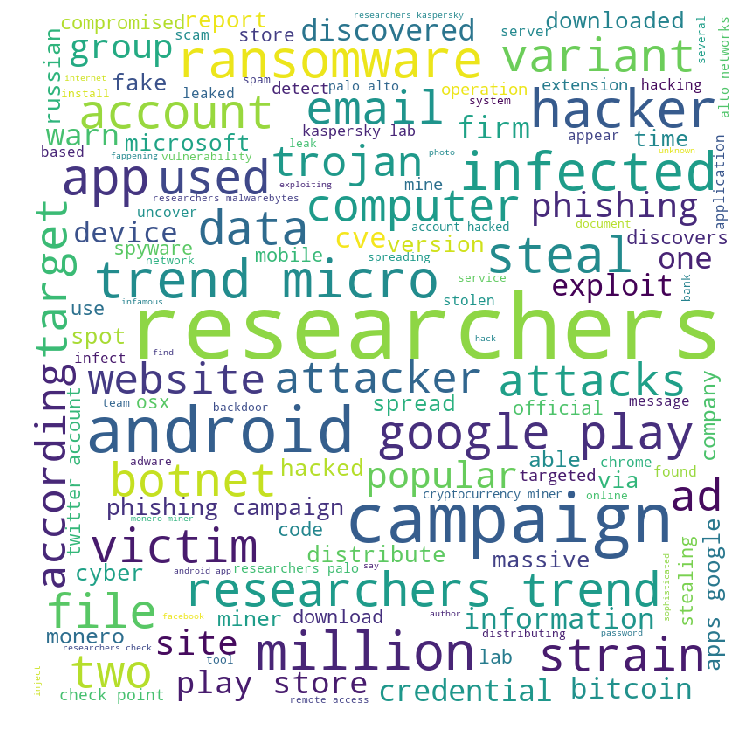

In [164]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None

cyber_individual = cyber[cyber['target_code'] == 'X']
cyber_individual['description'] = cyber_individual['description'].str.lower()

new_stopwords=STOPWORDS.union(set(['malware','researcher', 'new', 'user','users','discover',\
                                   'called','attack','malicious','dubbed','security','reveal','detail'\
                                  'details','detail','details','reveals','victim','using','targeting']))
wordcloud = WordCloud(width = 800, height = 800,
              background_color ='white',
                stopwords = new_stopwords,
                min_font_size = 10).generate(' '.join(cyber_individual['description']))


plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

#plt.savefig('wordcloud.png')

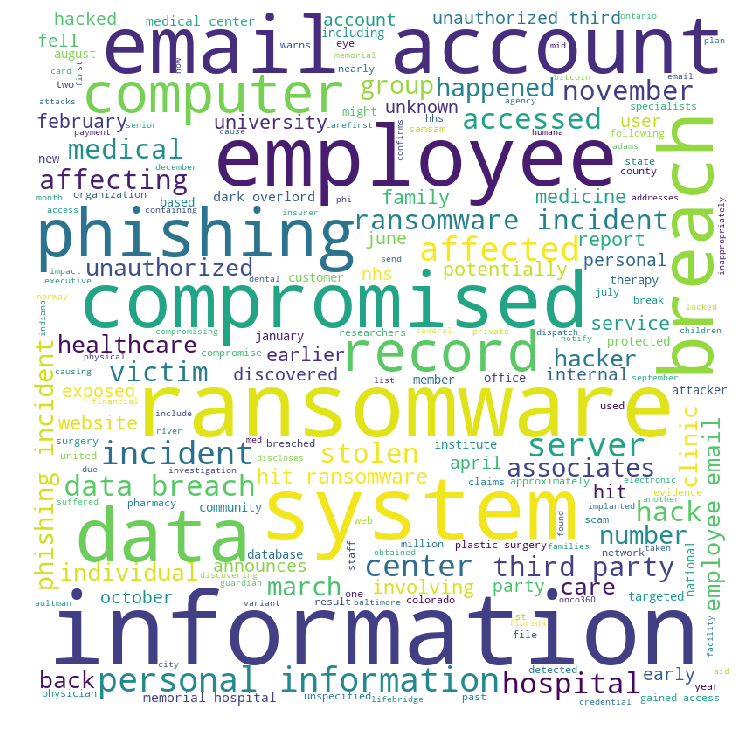

In [160]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None

cyber_individual = cyber[cyber['target_code'] == 'Q']
cyber_individual['description'] = cyber_individual['description'].str.lower()

new_stopwords=STOPWORDS.union(set(['malware','researcher', 'may', 'patients','patient','discover',\
                                   'called','attack','malicious','dubbed','security','reveal','detail'\
                                  'details','detail','details','reveals','health','occurred','targeting', 'notifies']))
wordcloud = WordCloud(width = 800, height = 800,
              background_color ='white',
                stopwords = new_stopwords,
                min_font_size = 10).generate(' '.join(cyber_individual['description']))


plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('wordcloud_health.png')

## attacks by targets 2017 vs 2018

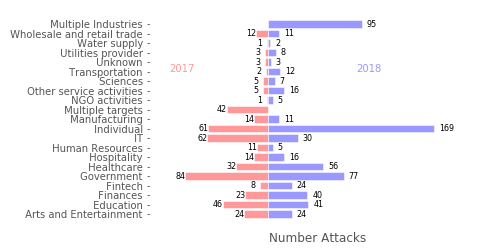

In [11]:
# 2017 plot
cyber2017_target = cyber['01/01/2017':'06/30/2017'].groupby("target_class")['attack'].count()
cyber2017_target = pd.DataFrame(cyber2017_target)
cyber2017_target.columns = ["attacks_2017"]
cyber2017_target.reset_index()
X1 = cyber2017_target.reset_index()['target_class']
Y1 = np.array(cyber2017_target['attacks_2017'].astype(int))
plt.barh(X1, -Y1, facecolor='#ff9999', edgecolor='white', color='white')

# 2018 plot
cyber2018_target = cyber['01/01/2018':'06/30/2018'].groupby("target_class")['attack'].count()
cyber2018_target = pd.DataFrame(cyber2018_target)
cyber2018_target.columns = ["attacks_2018"]
cyber2018_target.reset_index()
X2 = cyber2018_target.reset_index()['target_class']
Y2 = np.array(cyber2018_target['attacks_2018'].astype(int))
plt.barh(X2, +Y2, facecolor='#9999ff', edgecolor='white', color='white')

#combined

ax = plt.gca()
ax.set_facecolor('white')

for x,y in zip(Y2,X2):
    plt.text(x+5, y, '%s' % str(x), ha='left', va= 'center', fontsize=8)

for x,y in zip(Y1,X1):
    plt.text(-x-10, y, '%s' % str(x), ha='left', va= 'center', fontsize=8)
    
plt.xlim(-120,+220)
plt.xticks([])

plt.xlabel('Number Attacks')

plt.text(90,15,'2018',color='#9999ff',size=10)
plt.text(-100,15,'2017',color='#ff9999',size=10)

plt.savefig('targets_2017_2018.png')

## number of attacks 2017 vs 2018 

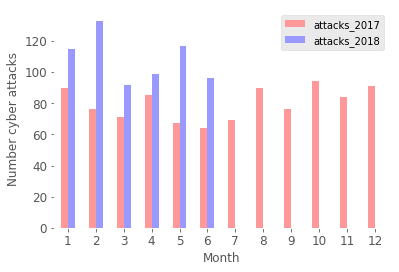

In [12]:
cyber2017 = cyber['01/01/2017':'12/31/2017'].groupby("month")['attack'].count()
cyber2017 = pd.DataFrame(cyber2017)
cyber2017.columns = ["attacks_2017"]


cyber2018 = cyber['01/01/2018':'07/31/2018'].groupby('month')['attack'].count()
cyber2018 = pd.DataFrame(cyber2018)
cyber2018.columns = ['attacks_2018']

cyber_2017_2018 = pd.concat([cyber2017, cyber2018],axis = 1, join = 'outer')

cyber_2017_2018.plot.bar(color = ['#ff9999','#9999ff'], rot = 0, fontsize=12).set_facecolor('white')
plt.xlabel('Month')
plt.ylabel('Number cyber attacks')

plt.savefig('attacks_2017_2018.png')

## causes individual attack

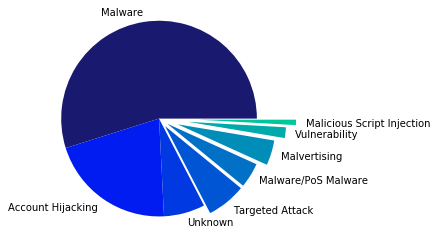

In [163]:
cyber2 = cyber.reset_index()
cyber2['target_class']  = cyber2.target_class.astype('str')
cyber2.loc[cyber2.target_code == 'X'].groupby('attack')['target_code'].count().sort_values(ascending = False)
cyber3 = cyber2.loc[cyber2.target_code == 'X'].groupby('attack').filter(lambda x: x.shape[0] > 2)

colors = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C']
explode = (0, 0, 0,0.1,0.1,0.2,0.3,0.4)
cyber3.groupby('attack')['target_code'].count().sort_values(ascending = False).plot(kind='pie', colors=colors, explode=explode)
plt.ylabel('')
plt.axis('equal')
plt.savefig('individuals_pie.jpg')

In [6]:
cyber

,attack,attack_class,author,country,description,target,target_class,url,target_code,year,month
date,,,,,,,,,,,
2018-01-01,Unknown,CC,NaN,UK,2018 begins with a new round of Fappening leak...,Faye Brookes,Individual,http://news.softpedia.com/news/the-2018-fappen...,X,2018,1
2018-01-01,Malware,CC,NaN,US,Rockingham County Schools servers are compromi...,Rockingham County Schools,Education,https://www.databreaches.net/nc-emotet-malware...,P,2018,1
2018-01-02,Unknown,CC,Andariel,KR,Bloomberg reveals that a hacking unit called A...,Unnamed South Korean Company,Unknown,https://www.bloomberg.com/news/articles/2018-0...,Z,2018,1
2018-01-02,SQLi?,CC,@0x55Taylor,US,A hacker using the twitter handle @0x55Taylor ...,thefly.com,IT,https://www.cyberwarnews.info/2018/01/02/clear...,J,2018,1
2018-01-03,Malware,CC,NaN,Multiple,Symantec researchers discover a new malware st...,Uber Users,Individual,https://gizmodo.com/rare-malware-targeting-ube...,X,2018,1
2018-01-03,Malware,CC,NaN,Multiple,Researchers from Trend Micro discover 36 apps ...,Android Users,Individual,http://www.ibtimes.co.uk/36-fake-security-apps...,X,2018,1
2018-01-03,Malware,CC,NaN,US,The city of Farmington is hit by a variant of ...,City of Farmington,Healthcare,http://www.daily-times.com/story/news/local/fa...,Q,2018,1
2018-01-03,Malware,CC,NaN,Multiple,Researchers at F5 discover a new Linux crypto-...,Linux Servers,Individual,http://securityaffairs.co/wordpress/67408/brea...,X,2018,1
2018-01-03,Malware,CC,NaN,Multiple,Researchers from security company Quick Heal r...,Bank customers globally,Individual,https://www.infosecurity-magazine.com/news/and...,X,2018,1
